# Milestone 1

# Introduction

Nama    : Arnaz Tejakusuma

Batch   : 012

# Data description

Dataset yang digunakan untuk project ini merupakan record penggunaan kartu kredit di Taiwan pada bulan April - September 2005. Dataset ini memuat berbagai informasi mulai dari yang sifatnya umum seperti credit limit, sex, age, education level, and marital status. Sampai informasi yang sifatnya lebih terperinci seperti repayment status, amount of bill, dan,amount of previous payment. Data-data ini dapat digunakan oleh analis kartu kredit bank untuk memperkirakan kemungkinan nasabah mengalami gagal bayar. Dataset ini diperoleh dari Google Cloud Platform dengan link sebagai berikut: https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=ml_datasets&t=credit_card_default&page=table.

Nama-nama kolom yang digunakan dalam dataset ini mungkin tidak umum bagi sebagian besar orang. Untuk itu saya mencari sumber yang memuat interpretasi dari setiap kolom.

- limit_balance      : Amount of given credit in New Taiwan dollars

- sex                : Gender (1 = male, 2 = female)

- education_level    : (1 = graduate school, 2 = university, 3 = high school, 4 = others)

- marital_status     : Marital status (1 = married, 2 = single, 3 = others)

- age                : Age in years

- pay_0              : Repayment status in September 2005 (-1 = pay duly, 1 = payment delay for one month, 2 = payment delay for two months, ..... 8 = payment delay for eight months, 9 = payment delay for none months and above).

- pay_2, pay_3, pay_4, pay_5, pay_6: Repayment status in August, July, June, May, April 2005 (same scale as above).

- bill_amt_1: Amount of bill statement in September 2005 in New Taiwan dollars.

- bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6: Amount of bill statement in August, July, June, May, April 2005 in New Taiwan dollars.

- pay_amt_1: Amount of previous payment in September 2005 in New Taiwan dollars.

- pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6: Amount of previous payment in August, July, June, May, April 2005 in New Taiwan dollards.

- default_payment_next_month: Default payment/gagal bayar (1 = yes, 0 = no).

Sumber: https://towardsdatascience.com/catching-a-welcher-classifying-a-credit-card-defaulter-f4b21547a618

# Objectives

Project ini merupakan Milestone 1 di Fase 1 Program FTDS untuk mengevaluasi pemahaman mengenai supervised learning. Dalam project ini, tujuan utamanya adalah memprediksi 'default_payment_next_month' atau kemungkinan nasabah mengalami gagal bayar. Prediksi akan dilakukan dengan membandingkan beberapa model sekaligus yakni:

- Logistic Regression
- SVM
- Decision Tree
- Random Forest
- KNN
- Naive Bayes
- Ada Boost

# Memperoleh data dari Google Cloud Platform

Berikut adalah query yang digunakan untuk memperoleh data dari Google Cloud Platform:

SELECT limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month

FROM `bigquery-public-data.ml_datasets.credit_card_default` AS cc

LIMIT 23916;

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Data loading

In [2]:
# Loading dataset
df_ori = pd.read_csv('h8dsft_P1M1_Arnaz_Tejakusuma.csv')

In [3]:
# Membuat copy dari dataset agar dataset asli tetap utuh dan dapat dicek sewaktu-waktu
df_copy = df_ori.copy()

# Menampilkan dataset

In [4]:
# Mengganti display setting dari dataset agar tidak ada kolom yang terpotong
pd.set_option('display.max.columns', None)

In [5]:
# Memastikan dataset berhasil diload dengan baik, menampilkan 5 baris awal dari dataset
df_copy.head(5)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,1,2,39,0,0,0,0,0,0,47174,47974,48630,50803,30789,15874,1800,2000,3000,2000,2000,2000,0
1,110000,2,1,2,29,0,0,0,0,0,0,48088,45980,44231,32489,26354,20221,2000,2010,3000,3000,3000,1000,0
2,270000,1,1,2,36,0,0,0,2,0,0,78630,68921,46512,40335,37165,22156,10076,4018,14,2051,2000,0,0
3,130000,1,1,1,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
4,50000,1,1,2,24,0,0,0,0,0,0,42058,35340,22110,19837,19855,20151,1367,1606,692,709,721,692,0


In [6]:
# Memastikan dataset berhasil diload dengan baik, menampilkan 5 baris akhir dari dataset
df_copy.tail(5)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,210000,2,2,1,39,-1,-1,-1,-1,-2,-1,44100,0,28428,0,0,12000,0,28428,0,0,12000,33664,0
2961,280000,2,1,1,41,2,-1,-1,-1,-2,-1,280,6852,486,0,0,244,6859,486,0,0,244,0,0
2962,80000,1,1,2,28,1,-1,-1,-1,-2,-2,0,47,207,0,0,0,47,207,0,0,0,0,0
2963,200000,1,2,1,53,1,-1,-1,-2,-2,-1,0,2920,0,0,0,6753,2920,0,0,0,6753,0,1
2964,20000,2,1,2,24,-1,-1,-2,-2,-2,-2,379,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
# Memastikan dataset berhasil diload dengan baik, menampilkan 5 baris secara acak dari dataset
df_copy.sample(5)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
1720,70000,2,2,2,22,2,2,2,2,0,0,69242,71007,72596,70467,48129,47751,3500,3300,0,2000,2000,2000,0
1880,50000,2,3,2,26,1,2,2,2,2,2,31336,32320,33408,32577,34329,33643,1800,1900,0,2600,0,1700,1
1440,100000,1,2,1,40,0,0,0,-1,-1,-1,99958,76554,58610,9779,12273,2701,2975,2789,9779,12273,3105,16828,0
93,30000,2,2,2,50,0,0,0,0,0,0,25416,26260,24084,23631,29863,29369,1389,1602,1563,8500,1100,500,0
2159,280000,2,1,2,25,-2,-2,-2,-2,-2,-2,985,500,500,0,500,4778,505,500,0,500,4778,4898,0


# Preview dataset, memastikan jumlah baris, kolom, tipe data, dan memeriksa entry dengan value null

In [8]:
# Memastikan total jumlah baris dan kolom dari dataset
df_copy.shape

(2965, 24)

Dataset ini terdiri dari:

- 2965 baris

- 24 kolom

In [9]:
# Memeriksa tipe data
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               2965 non-null   int64
 1   sex                         2965 non-null   int64
 2   education_level             2965 non-null   int64
 3   marital_status              2965 non-null   int64
 4   age                         2965 non-null   int64
 5   pay_0                       2965 non-null   int64
 6   pay_2                       2965 non-null   int64
 7   pay_3                       2965 non-null   int64
 8   pay_4                       2965 non-null   int64
 9   pay_5                       2965 non-null   int64
 10  pay_6                       2965 non-null   int64
 11  bill_amt_1                  2965 non-null   int64
 12  bill_amt_2                  2965 non-null   int64
 13  bill_amt_3                  2965 non-null   int64
 14  bill_amt

Secara singkat singkat dapat kita lihat bahwa:

- Terdapat 24 kolom dengan tipe integer

- Berdasarkan pengamatan singkat, tidak terdapat entry dengan value null. Namun nantinya akan diteliti lebih lanjut apakah ada entry dengan value anomali.

In [10]:
# Memastikan kolom yang memiliki entry null
df_copy.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

Dataset ini memang sepertinya tidak memiliki entry dengan value null. Namun nantinya akan diteliti lebih lanjut apakah ada entry dengan value anomali.

In [11]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
limit_balance,2965.0,163369.308600,125030.415472,10000.0,50000.0,140000.0,230000.0,800000.0
sex,2965.0,1.607757,0.488333,1.0,1.0,2.0,2.0,2.0
education_level,2965.0,1.849578,0.778184,0.0,1.0,2.0,2.0,6.0
marital_status,2965.0,1.559865,0.522317,0.0,1.0,2.0,2.0,3.0
age,2965.0,35.193255,9.109439,21.0,28.0,34.0,41.0,69.0
pay_0,2965.0,0.005059,1.114395,-2.0,-1.0,0.0,0.0,8.0
pay_2,2965.0,-0.122428,1.180784,-2.0,-1.0,0.0,0.0,7.0
pay_3,2965.0,-0.141653,1.183630,-2.0,-1.0,0.0,0.0,7.0
pay_4,2965.0,-0.185160,1.178322,-2.0,-1.0,0.0,0.0,8.0
pay_5,2965.0,-0.225295,1.159003,-2.0,-1.0,0.0,0.0,7.0


Berdasarkan observasi singkat, dalam kolom 'education_level' dan 'marital_status' sepertinya terdapat entry dengan value anomali yaitu 0.0. kedua kolom tersebut seharusnya tidak memiliki entry 0.0.

Entry yang benar seharusnya:
- education_level    : (1 = graduate school, 2 = university, 3 = high school, 4 = others)

- marital_status     : Marital status (1 = married, 2 = single, 3 = others)

Sumber: https://towardsdatascience.com/catching-a-welcher-classifying-a-credit-card-defaulter-f4b21547a618

# Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Credit Card Limit Balance')

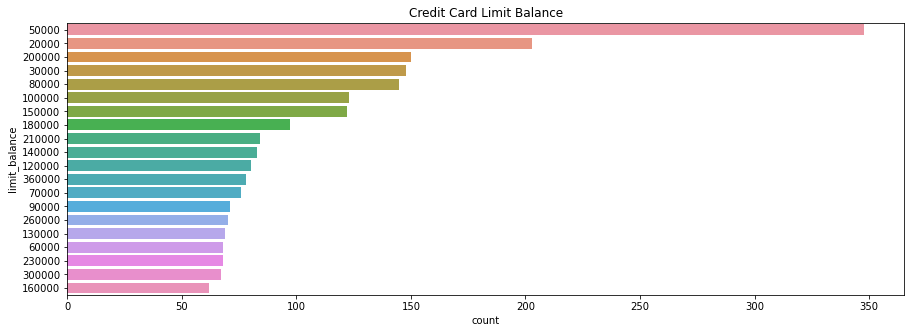

In [12]:
plt.figure(figsize=(15,5))
sns.countplot(y='limit_balance', data=df_copy, order=df_copy.limit_balance.value_counts().iloc[:20].index)
plt.title('Credit Card Limit Balance')

Berdasarkan diagram batang diatas, jumlah limit kartu kredit yang paling banyak digunakan oleh nasabah adalah 50k NT dollars. Sedangkan urutan kedua terbanyakan adalah 20k NT dollars. Limit ini sebenarnya tidak terlalu tinggi, artinya sebagian besar nasabah pengguna kartu kredit kemungkinan besar merupakan kelas menengah dan menengah kebawah.

*NT dollar atau New Taiwan dollar adalah mata uang negara Taiwan.

Text(0.5, 1.0, 'Credit Card User by Sex')

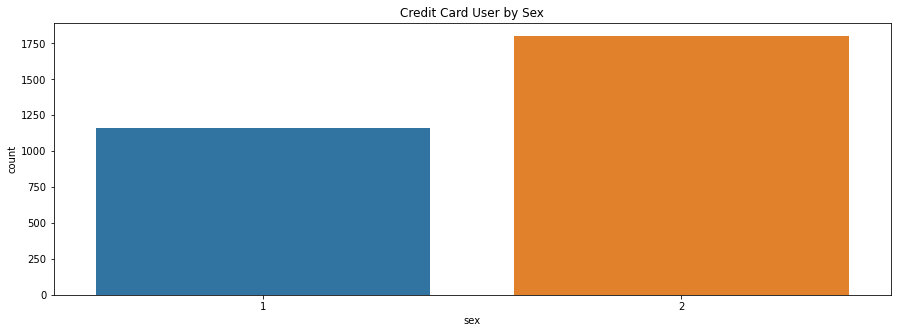

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(x='sex', data=df_copy)
plt.title('Credit Card User by Sex')

Berdasarkan diagram batang diatas, pengguna kartu kredit didominasi oleh perempuan, jumlahnya cukup jauh diatas pengguna kartu kredit laki-laki. 

Interpretasi dari kolom sex: 1 = male, 2 = female

Sumber: https://towardsdatascience.com/catching-a-welcher-classifying-a-credit-card-defaulter-f4b21547a618

Text(0.5, 1.0, 'Credit Card User by Education Level')

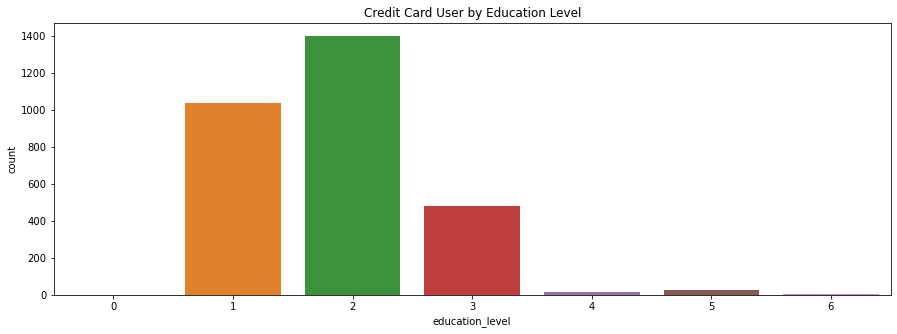

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(x='education_level', data=df_copy)
plt.title('Credit Card User by Education Level')

Berdasarkan tingkat pendidikan, pengguna kartu kredit di Taiwan didominasi oleh orang-orang yang berpendidikan tinggi. Dalam hal ini, orang dengan level pendidikan university merupakan yang tertinggi, diikuti oleh graduate school, dan high school.

Interpretasi dari kolom education_level: 1 = graduate school, 2 = university, 3 = high school, 4 = others

Sumber: https://towardsdatascience.com/catching-a-welcher-classifying-a-credit-card-defaulter-f4b21547a618

Text(0.5, 1.0, 'Credit Card User by Marital Status')

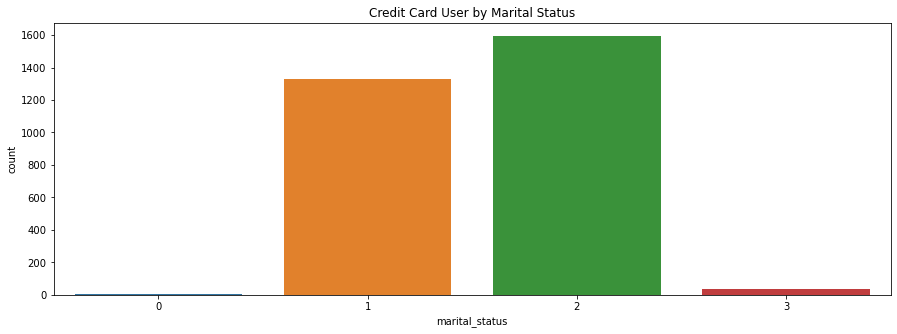

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(x='marital_status', data=df_copy)
plt.title('Credit Card User by Marital Status')

Tidak ada perbedaan signifikan antara pengguna kartu kredit yang sudah berkeluarga atau yang berlum berkeluarga, jumlahnya cukup berimbang. Tadinya saya berasumsi bahwa penggunaan kartu kredit akan didominasi oleh orang yang berlum berkeluarga. Karena orang yang sudah berkeluarga sepertinya harus lebih bijak dalam mengelola keuangan. Karena penggunaan kartu kredit itu sebenarnya sama saja dengan berhutang kepada bank, maka kemungkinan orang-orang yang sudah berkeluarga lebih melimit penggunaan kartu kredit.

Ternyata di Taiwan hal ini tidak begitu berpengaruh. Website theglobaleconomy.com merilis data bahwa pengunaan kartu kredit cenderung sangat tinggi di negara-negara maju. Dalam hal penggunaan kartu kredit, Taiwan menduduki peringkat 15 teratas secara global. Untuk perbandingan, Indonesia menduduki menduduki peringkat 118.

Interpretasi dari kolom marital_status: 1 = married, 2 = single, 3 = others

Sumber: https://towardsdatascience.com/catching-a-welcher-classifying-a-credit-card-defaulter-f4b21547a618, https://www.theglobaleconomy.com/rankings/people_with_credit_cards/

Text(0.5, 1.0, 'Credit Card User by Age')

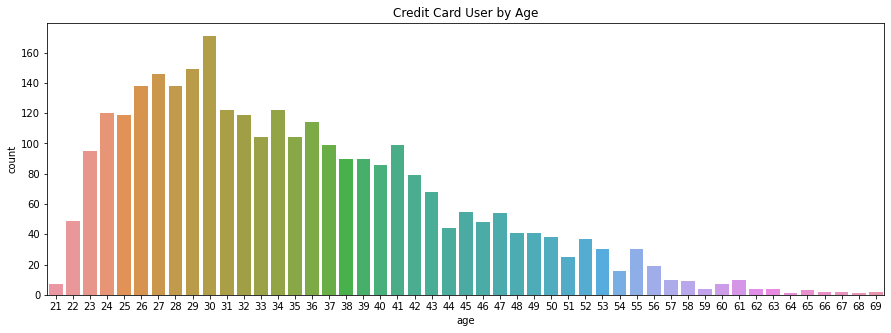

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(x='age', data=df_copy)
plt.title('Credit Card User by Age')

Saya menduga bahwa pengguna kartu kredit akan didominasi oleh kaum muda. Bedasarkan diagram batang diatas, asumsi tersebut sepertinya terbukti. Kebanyakan pengguna kartu kredit adalah orang yang berusia 20-30 tahunan. Sedangkan orang-orang yang berusia lanjut sangat sedikit sekali yang menggunakan kartu kredit. Memang ada anggapan bahwa "cash is king" terutama untuk orang-orang tua dan sepertinya terbukti dalam dataset ini.

Kemungkinan besar orang tua memilih tidak menggunakan kartu kredit karena mereka menganggap menggunakan kartu kredit itu sama saja dengan berutang, belum lagi sistem penggunaan dan pembayarannya yang mungkin cukup rumit untuk dipahami oleh mereka. Selain itu kemungkinan mereka tidak merasa aman untuk menggunakan kartu kredit. Hal ini tidak salah, mengingat memang cukup marak penipuan kartu kredit yang terjadi. Jadi sepertinya ungkapan "cash is king" memang belum mati.

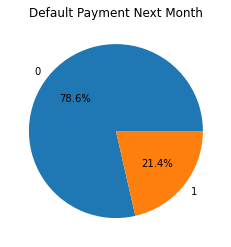

In [17]:
plt.pie(df_copy.groupby('default_payment_next_month').size(), labels=df_copy.groupby('default_payment_next_month').size().index, autopct='%1.1f%%')
plt.title('Default Payment Next Month')
plt.show()

Istilah "default_payment_next_month" berarti bank memperkirakan bahwa nasabah pengguna kartu kredit akan mengalami gagal bayar ketika tagihan jatuh tempo di bulan yang akan datang. Berdasarkan diagram lingkaran diatas, presentase orang yang diperkirakan gagal bayar cukup tinggi, presentasenya mencapai 21.4%.

Dataset pengguna kartu kredit ini berasal dari bulan April - September 2005. Berdasarkan riset yang saya lakukan, Ternyata pada tahun 2005-2006 Taiwan sedang mengalami krisis utang kartu kredit. Krisis tersebut memuncak pada Februari 2006, dimana total utang kartu kredit mencapai 268 miliar USD. Saat itu, sekitar 500.000 orang mengalami gagal bayar. Dari Fakta ini, dapat kita tarik benang merah bahwa pada bulan April - September 2005, tanda-tanda krisis sudah mulai terlihat, dibuktikan dengan 21.4% pengguna kartu kredit mengalami gagal bayar. Jumlah ini sangat tinggi, mengingat populasi Taiwan secara keseluruhan hanya sekitar 20jt jiwa.

Interpretasi dari kolom default_payment_next_week: 0 = yes, 1 = no

Sumber: https://sevenpillarsinstitute.org/case-studies/taiwans-credit-card-crisis/, https://towardsdatascience.com/catching-a-welcher-classifying-a-credit-card-defaulter-f4b21547a618


Text(0.5, 1.0, 'Chance of Default Payment by Level of Education')

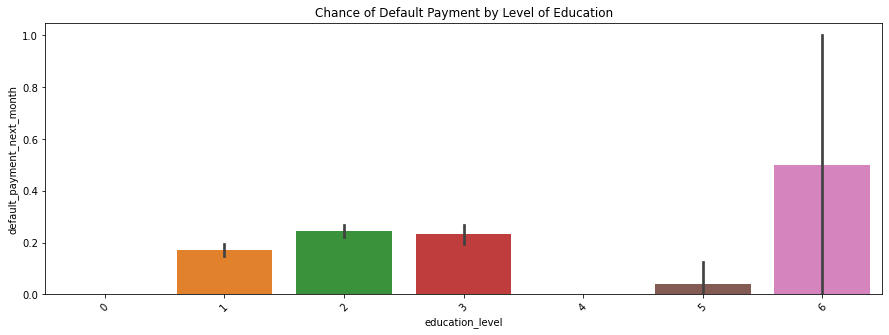

In [18]:
plt.figure(figsize=(15,5))
sns.barplot(x='education_level', y='default_payment_next_month', data=df_copy)
plt.xticks(rotation=45)
plt.title('Chance of Default Payment by Level of Education')

Tadinya saya ingin melihat apakah tingkat pendidikan seseorang memiliki korelasi dengan kemungkinan seseorang mengalami gagal bayar. Karena berdasarkan asumsi, seseorang dengan tingkat pendidikan yang tinggi seharusnya lebih well-informed dan lebih bijak dalam menggunakan kartu kredit. Namun karena ternyata pada periode ini Taiwan sedang mengalami krisis, jadi asumsi ini sepertinya tidak terbukti. Orang yang mengalami gagal bayar latar belakangnya berbeda-beda.

Interpretasi dari kolom education_level: 1 = graduate school, 2 = university, 3 = high school, 4 = others

Sumber: https://towardsdatascience.com/catching-a-welcher-classifying-a-credit-card-defaulter-f4b21547a618

Text(0.5, 1.0, 'Chance of Default Payment by Limit Balance')

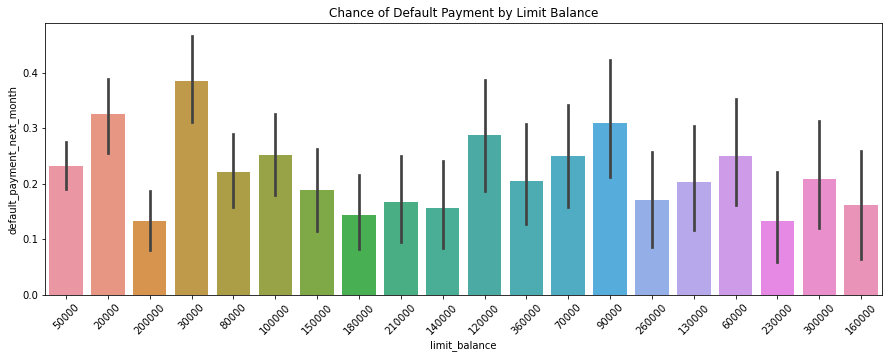

In [19]:
plt.figure(figsize=(15,5))
sns.barplot(x='limit_balance', y='default_payment_next_month', data=df_copy, order=df_copy.limit_balance.value_counts().iloc[:20].index)
plt.xticks(rotation=45)
plt.title('Chance of Default Payment by Limit Balance')

Berdasarkan diagram batang diatas, nasabah kartu kredit yang cenderung mengalami gagal bayar adalah nasabah yang limit kartu kreditnya tidak terlalu tinggi. Sehingga dapat kita asumsikan bahwa kelompok yang paling terdampak oleh krisis kartu kredit di Taiwan adalah kelas menengan dan menengah kebawah.

Text(0.5, 1.0, 'Repayment Status in September 2005')

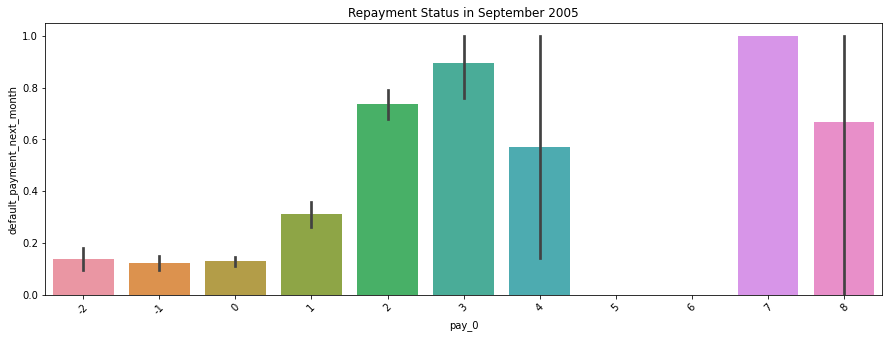

In [20]:
plt.figure(figsize=(15,5))
sns.barplot(x='pay_0', y='default_payment_next_month', data=df_copy)
plt.xticks(rotation=45)
plt.title('Repayment Status in September 2005')

Pada bulan September 2005, terlihat bahwa semakin banyak orang pemegang kartu kredit yang tunggakannya sudah berbulan-bulan, bahkan ada yang sudah menunggak sampai 7 atau 8 bulan. Hal ini menunjukkan bahwa pada periode ini, Taiwan semakin mendekati puncak krisis yang terjadi pada Februari 2006.

# Data Preprocessing

In [21]:
# Membuat dataframe inference, mengambil 10 entry yang nantinya digunakan untuk menguji model yang dibuat
df_inf = df_copy.sample(10, random_state=17)
df_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
91,420000,2,2,2,32,0,0,0,0,0,0,211688,205003,203118,198925,175684,164037,7300,8839,8000,5900,6000,6000,0
325,30000,2,2,2,25,2,0,0,0,0,0,10343,11069,12082,12473,12623,27460,1200,1201,592,500,1500,0,1
47,40000,2,3,1,60,0,0,0,0,0,0,14019,15780,18519,21058,8204,9899,2000,3000,3000,6000,2000,2000,0
1488,70000,2,3,3,39,0,0,-1,0,-1,0,34244,32193,10803,15133,3148,4699,3000,11000,5000,3150,2000,4000,0
446,60000,2,2,2,24,-1,0,-1,0,0,0,9970,7699,9479,10213,10000,11832,1020,9479,1000,200,1832,5889,0
567,300000,2,1,1,30,0,0,0,0,0,0,93738,84636,88446,76244,67747,70389,3000,5000,2500,2500,3500,87000,1
1473,500000,1,1,2,43,0,0,0,-1,-1,-1,504644,512650,0,3887,0,7413,22650,0,3887,0,7413,0,1
548,490000,2,2,1,30,0,0,0,0,0,-1,26088,24092,24488,16995,-1527,62491,2003,2041,1092,4,64895,3003,0
1768,80000,1,1,2,26,1,2,2,0,0,0,40029,41095,40137,40793,42990,42854,2000,0,1603,3000,2000,1056,0
1781,130000,2,2,1,34,2,2,2,2,2,2,28967,30776,33071,32336,34186,34588,2500,3000,0,2600,1000,1500,1


In [22]:
# Mendrop data yang telah dipilih menjadi inference dari dataset
df_train = df_copy.drop(df_inf.index)
df_train

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,1,2,39,0,0,0,0,0,0,47174,47974,48630,50803,30789,15874,1800,2000,3000,2000,2000,2000,0
1,110000,2,1,2,29,0,0,0,0,0,0,48088,45980,44231,32489,26354,20221,2000,2010,3000,3000,3000,1000,0
2,270000,1,1,2,36,0,0,0,2,0,0,78630,68921,46512,40335,37165,22156,10076,4018,14,2051,2000,0,0
3,130000,1,1,1,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
4,50000,1,1,2,24,0,0,0,0,0,0,42058,35340,22110,19837,19855,20151,1367,1606,692,709,721,692,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000,2,2,1,39,-1,-1,-1,-1,-2,-1,44100,0,28428,0,0,12000,0,28428,0,0,12000,33664,0
2961,280000,2,1,1,41,2,-1,-1,-1,-2,-1,280,6852,486,0,0,244,6859,486,0,0,244,0,0
2962,80000,1,1,2,28,1,-1,-1,-1,-2,-2,0,47,207,0,0,0,47,207,0,0,0,0,0
2963,200000,1,2,1,53,1,-1,-1,-2,-2,-1,0,2920,0,0,0,6753,2920,0,0,0,6753,0,1


In [23]:
# Mereset index agar tidak terjadi kesalahan yang disebabkan oleh index yang belum direset
df_train.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)

# Membagi Dataset menjadi X (feature) dan y (target)

Dalam project ini yang menjadi target adalah kolom 'default_payment_next_month' maka kolom 'default_payment_next_month' harus didrop dari X (feature). Kolom 'default_payment_next_month' hanya boleh ada di y (target).

In [24]:
# Membagi antara X(feature) dengan y(target)
X = df_train.drop('default_payment_next_month', axis=1)
y = df_train['default_payment_next_month']
X

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,50000,1,1,2,39,0,0,0,0,0,0,47174,47974,48630,50803,30789,15874,1800,2000,3000,2000,2000,2000
1,110000,2,1,2,29,0,0,0,0,0,0,48088,45980,44231,32489,26354,20221,2000,2010,3000,3000,3000,1000
2,270000,1,1,2,36,0,0,0,2,0,0,78630,68921,46512,40335,37165,22156,10076,4018,14,2051,2000,0
3,130000,1,1,1,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291
4,50000,1,1,2,24,0,0,0,0,0,0,42058,35340,22110,19837,19855,20151,1367,1606,692,709,721,692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950,210000,2,2,1,39,-1,-1,-1,-1,-2,-1,44100,0,28428,0,0,12000,0,28428,0,0,12000,33664
2951,280000,2,1,1,41,2,-1,-1,-1,-2,-1,280,6852,486,0,0,244,6859,486,0,0,244,0
2952,80000,1,1,2,28,1,-1,-1,-1,-2,-2,0,47,207,0,0,0,47,207,0,0,0,0
2953,200000,1,2,1,53,1,-1,-1,-2,-2,-1,0,2920,0,0,0,6753,2920,0,0,0,6753,0


In [25]:
# Membagi antara train dan test set, train set presentasenya adalah 80% dan test set presentasenya adalah 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

print('Train size:' , X_train.shape)
print('Test size:', X_test.shape)

Train size: (2364, 23)
Test size: (591, 23)


# Feature Selection

<AxesSubplot:>

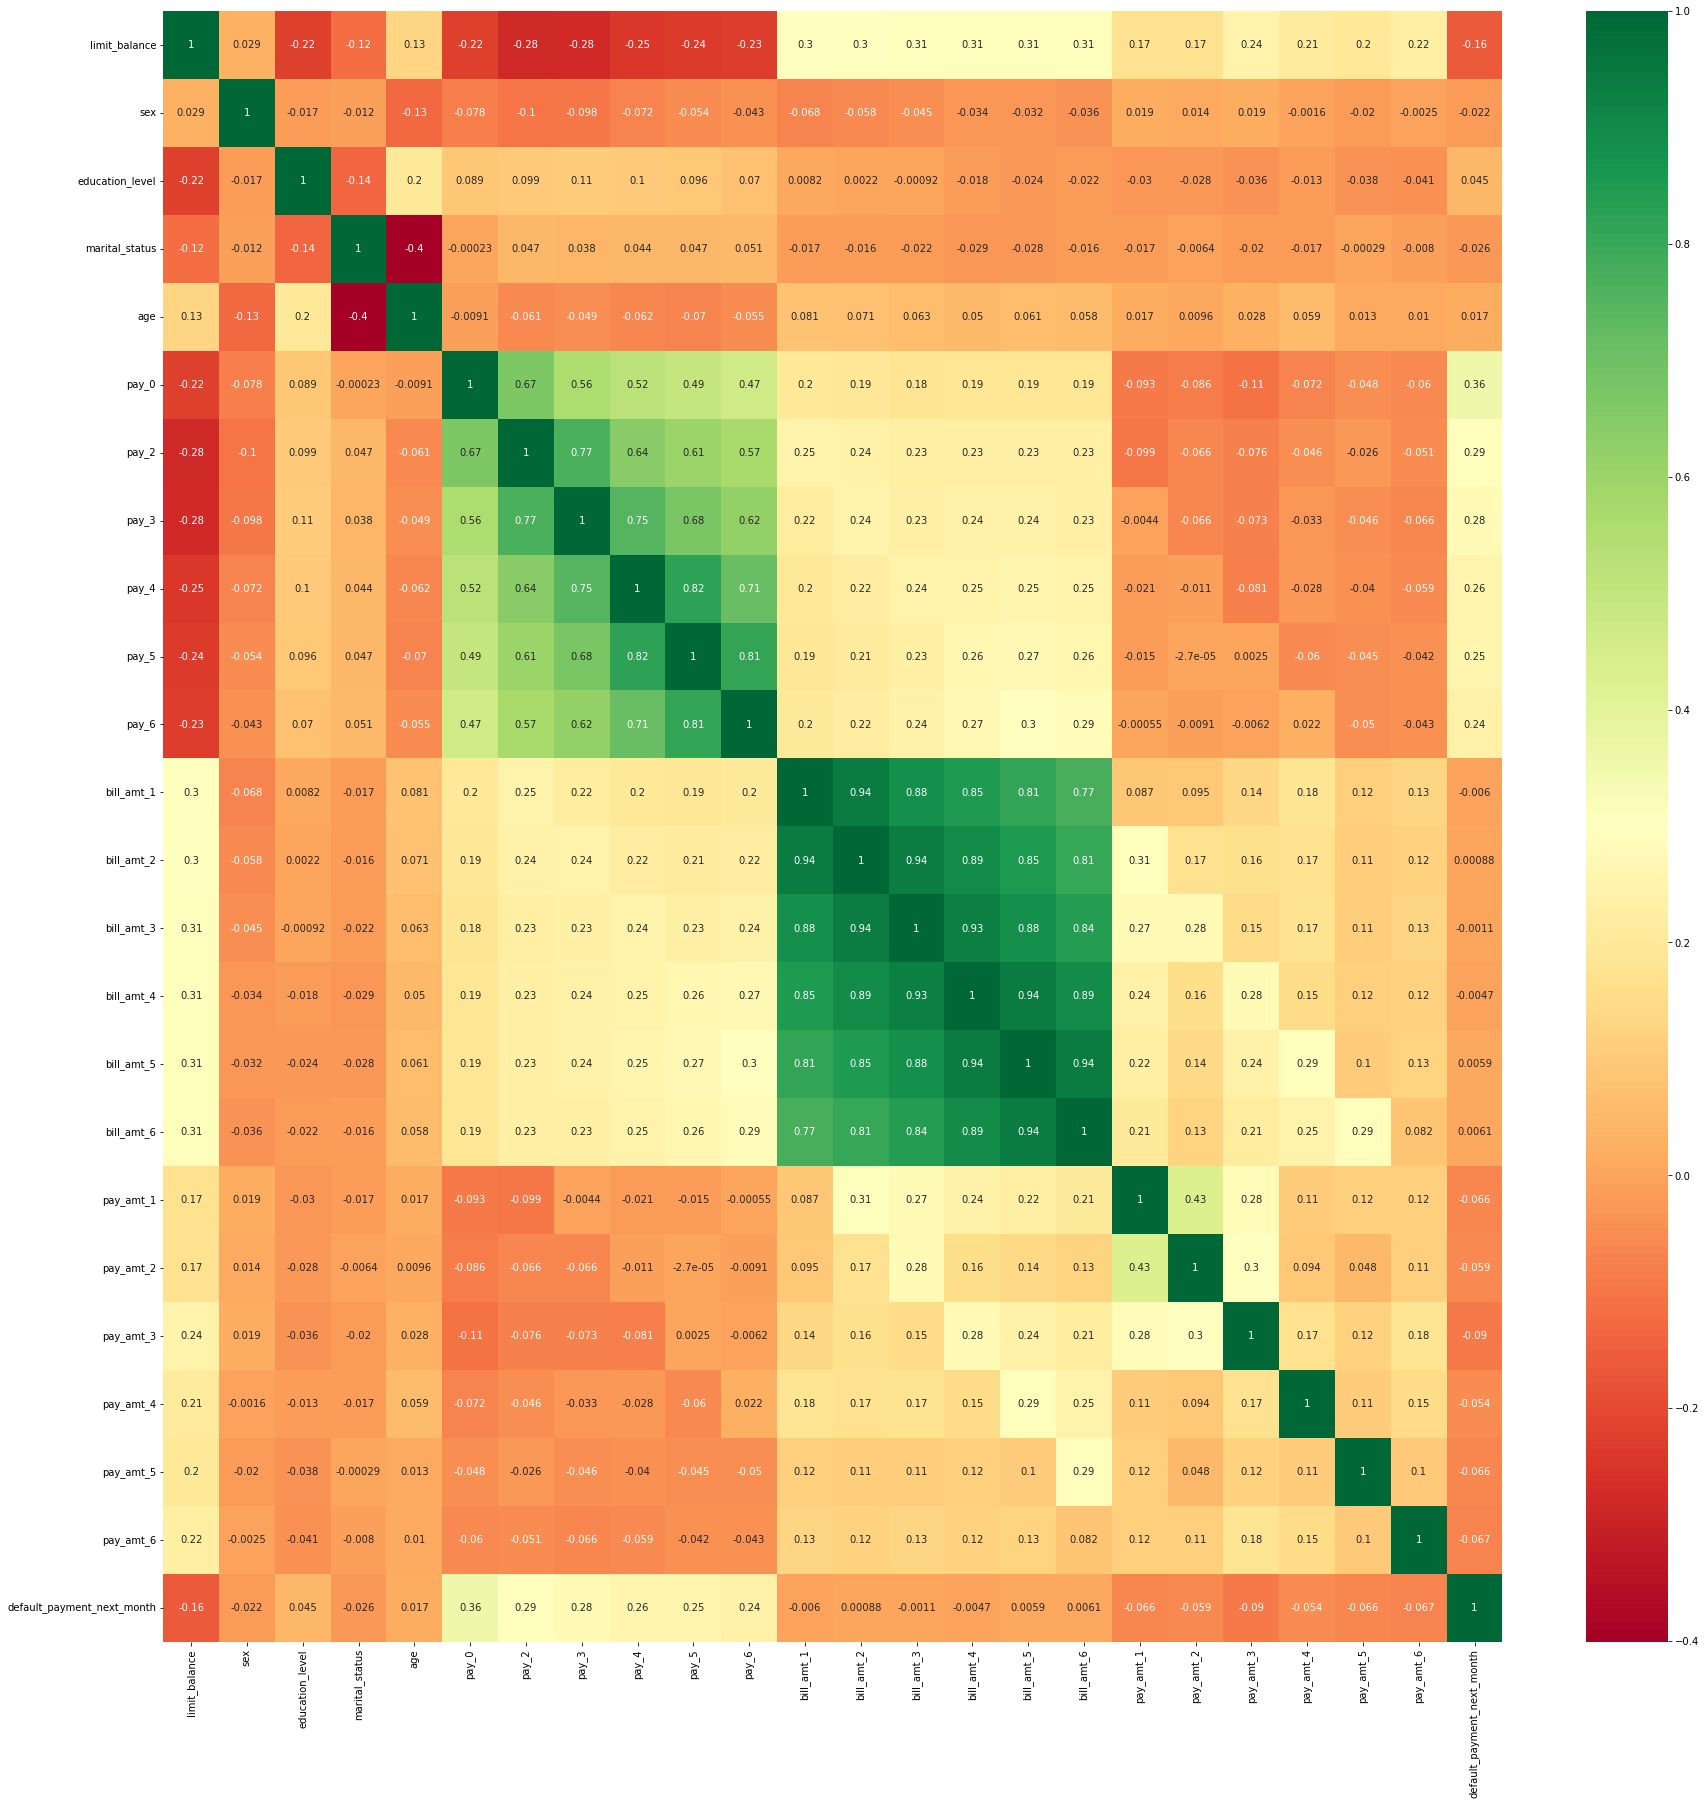

In [26]:
# Cek korelasi antara target dengan feature menggunakan heatmap
plt.figure(figsize=(30,30))
sns.heatmap(df_copy.corr(), annot=True, cmap='RdYlGn')

Berdasarkan heatmap, sepertinya hampir semua kolom numerikal harus dijadikan feature. kolom limit balance, pay, bill amount, dan pay amount dipilih menjadi feature karena berkorelasi dengan feature. Untuk sex, education, dan marital status tidak saya pilih menjadi feature karena menurut saya ketiga kolom ini tidak memiliki korelasi secara langsung dengan feature.

Untuk project ini, kolom yang saya jadikan feature adalah 'limit_balance', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
'pay_amt_6'

In [27]:
# Membuat variabel yang berisikan kolom-kolom yang dipilih menjadi feature
X_train_feature = X_train[['limit_balance', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']]
X_test_feature = X_test[['limit_balance', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']]
X_train_feature

,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
810,120000,-1,0,0,0,0,0,8922,43070,47023,53576,57529,61392,35000,5000,8000,5000,5000,4000
2575,160000,1,-1,-1,-1,-1,-1,0,1496,1496,1496,1496,1496,1496,1496,1496,1496,1496,1496
366,100000,0,0,0,0,0,0,62300,63759,64448,38500,39469,40653,2464,1902,1378,1589,2000,1506
2622,170000,-1,-1,-1,-1,-1,-1,3105,1599,1122,1692,648,0,1599,1122,1692,648,0,631
2891,110000,1,-1,-1,-2,-2,-2,0,780,0,0,0,0,780,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,60000,0,0,0,2,2,2,24066,24786,27050,26317,28200,28762,1414,2678,0,2310,1173,0
406,150000,0,0,0,0,0,0,146018,147598,148393,149709,107862,108623,7000,7600,6000,4000,4100,4300
1414,20000,0,0,0,0,2,2,4338,5355,6369,6891,6635,7287,1092,1106,628,0,762,0
2191,350000,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0


# Handling missing values

In [28]:
# Memeriksa missing value dalam train set
X_train_feature.isnull().sum()

limit_balance    0
pay_0            0
pay_2            0
pay_3            0
pay_4            0
pay_5            0
pay_6            0
bill_amt_1       0
bill_amt_2       0
bill_amt_3       0
bill_amt_4       0
bill_amt_5       0
bill_amt_6       0
pay_amt_1        0
pay_amt_2        0
pay_amt_3        0
pay_amt_4        0
pay_amt_5        0
pay_amt_6        0
dtype: int64

In [29]:
# Memeriksa missing value dalam train set
y_train.isnull().sum()

0

In [30]:
# Memeriksa missing value dalam test set
X_test_feature.isnull().sum()

limit_balance    0
pay_0            0
pay_2            0
pay_3            0
pay_4            0
pay_5            0
pay_6            0
bill_amt_1       0
bill_amt_2       0
bill_amt_3       0
bill_amt_4       0
bill_amt_5       0
bill_amt_6       0
pay_amt_1        0
pay_amt_2        0
pay_amt_3        0
pay_amt_4        0
pay_amt_5        0
pay_amt_6        0
dtype: int64

In [31]:
# Memeriksa missing value dalam test set
y_test.isnull().sum()

0

Memastikan kembali bahwa dataset tidak memiliki entry dengan value null. Pada bagian preview dataset, ditemukan entry dengan value anomali pada kolom 'marital_status' dan 'education_level' namun karena kedua kolom tersebut tidak dipilih menjadi feature, maka tidak diperlukan proses modifikasi data pada kedua kolom tersebut.

# Membagi kolom numerikal dan kategorikal

In [32]:
# Membuat variabel yang berdasarkan tipe kolom
num_cols = ['limit_balance', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
cat_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

print('Kolom numerikal:', num_cols)
print('Kolom kategorikal:', cat_cols)

Kolom numerikal: ['limit_balance', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
Kolom kategorikal: ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']


Berdasarkan dtypes, seluruh kolom merupakan integer. Namun demikian, dataset ini tetap memiliki kolom kategorikal. Hanya saja kolom kategorikal tersebut sudah diubah kedalam bentuk angka. Untuk menentukan kolom mana yang numerikal atau kategorikan, saya merujuk pada page 'SCHEMA' di Google Cloud Platform (link: https://console.cloud.google.com/bigquery?referrer=search&project=bigqueryhacktiv8&ws=!1m5!1m4!4m3!1sbigquery-public-data!2sml_datasets!3scredit_card_default).

In [33]:
# Membagi train dan test set berdasarkan tipe kolom
X_train_num = X_train_feature[num_cols]
X_train_cat = X_train_feature[cat_cols]

X_test_num = X_test_feature[num_cols]
X_test_cat = X_test_feature[cat_cols]

# Handling Outliers

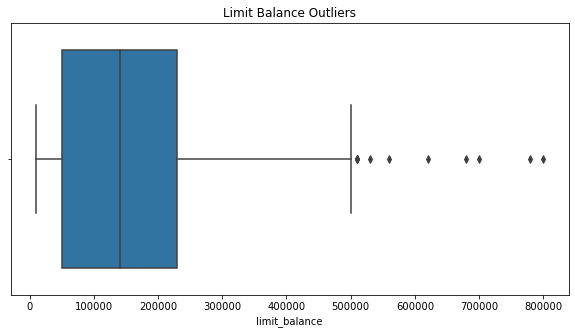

Skewness: 1.0213265650172134


In [34]:
# Cek outliers 'limit_balance'
plt.figure(figsize=(10,5))
sns.boxplot(X_train_num.limit_balance)
plt.title('Limit Balance Outliers')
plt.show()

print('Skewness:', X_train_num['limit_balance'].skew())

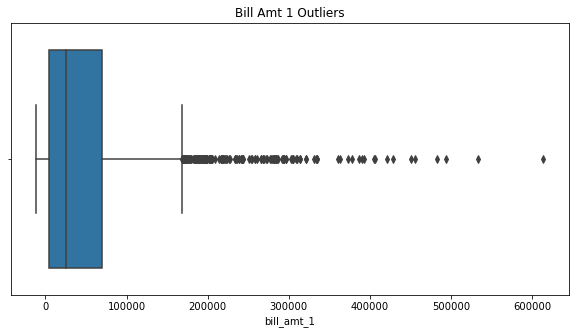

Skewness: 2.4325066300025067


In [35]:
# Cek outliers 'bill_amt_1'
plt.figure(figsize=(10,5))
sns.boxplot(X_train_num.bill_amt_1)
plt.title('Bill Amt 1 Outliers')
plt.show()

print('Skewness:', X_train_num['bill_amt_1'].skew())

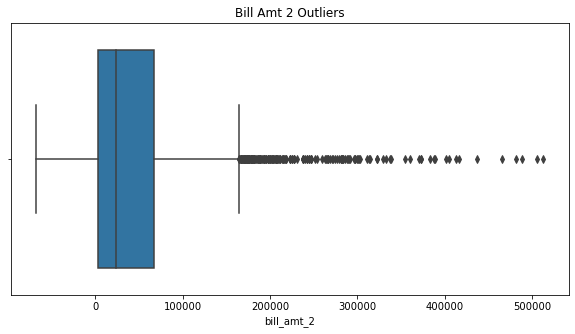

Skewness: 2.4182747164391194


In [36]:
# Cek outliers 'bill_amt_2'
plt.figure(figsize=(10,5))
sns.boxplot(X_train_num.bill_amt_2)
plt.title('Bill Amt 2 Outliers')
plt.show()

print('Skewness:', X_train_num['bill_amt_2'].skew())

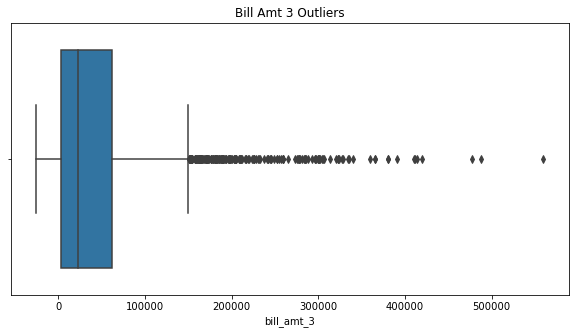

Skewness: 2.472460450925005


In [37]:
# Cek outliers 'bill_amt_3'
plt.figure(figsize=(10,5))
sns.boxplot(X_train_num.bill_amt_3)
plt.title('Bill Amt 3 Outliers')
plt.show()

print('Skewness:', X_train_num['bill_amt_3'].skew())

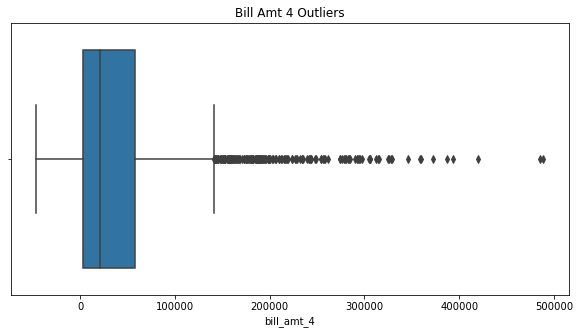

Skewness: 2.4434817285658634


In [38]:
# Cek outliers 'bill_amt_4'
plt.figure(figsize=(10,5))
sns.boxplot(X_train_num.bill_amt_4)
plt.title('Bill Amt 4 Outliers')
plt.show()

print('Skewness:', X_train_num['bill_amt_4'].skew())

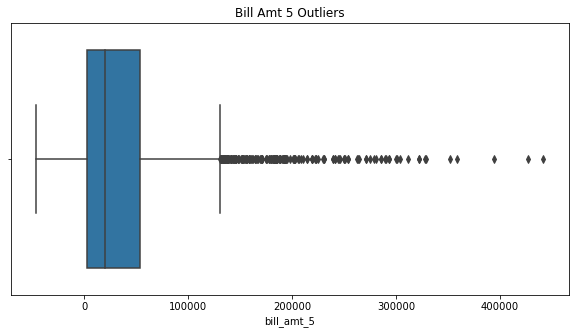

Skewness: 2.365683873243085


In [39]:
# Cek outliers 'bill_amt_5'
plt.figure(figsize=(10,5))
sns.boxplot(X_train_num.bill_amt_5)
plt.title('Bill Amt 5 Outliers')
plt.show()

print('Skewness:', X_train_num['bill_amt_5'].skew())

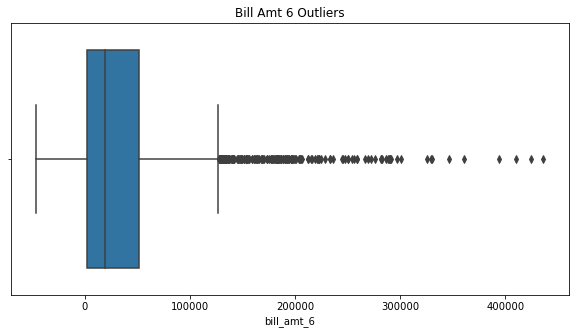

Skewness: 2.449248399054919


In [40]:
# Cek outliers 'bill_amt_6'
plt.figure(figsize=(10,5))
sns.boxplot(X_train_num.bill_amt_6)
plt.title('Bill Amt 6 Outliers')
plt.show()

print('Skewness:', X_train_num['bill_amt_6'].skew())

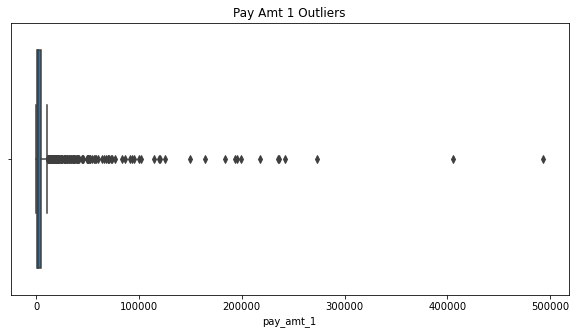

Skewness: 12.092124147008928


In [41]:
# Cek outliers 'pay_amt_1'
plt.figure(figsize=(10,5))
sns.boxplot(X_train_num.pay_amt_1)
plt.title('Pay Amt 1 Outliers')
plt.show()

print('Skewness:', X_train_num['pay_amt_1'].skew())

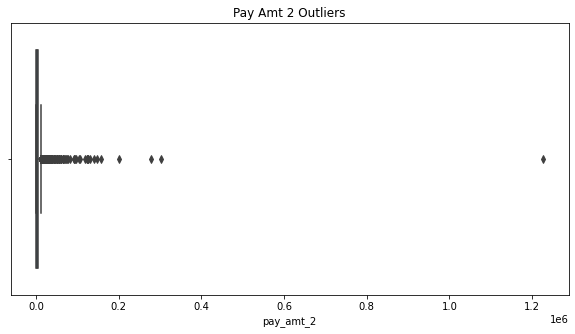

Skewness: 31.621811310584647


In [42]:
# Cek outliers 'pay_amt_2'
plt.figure(figsize=(10,5))
sns.boxplot(X_train_num.pay_amt_2)
plt.title('Pay Amt 2 Outliers')
plt.show()

print('Skewness:', X_train_num['pay_amt_2'].skew())

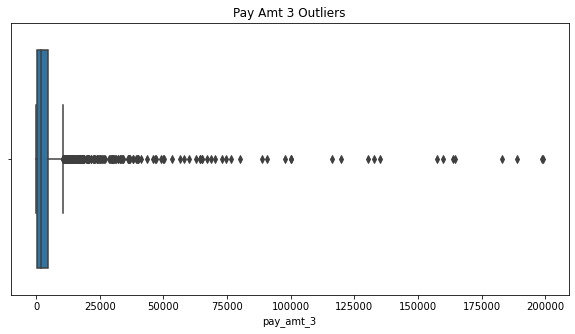

Skewness: 8.03744560085777


In [43]:
# Cek outliers 'pay_amt_3'
plt.figure(figsize=(10,5))
sns.boxplot(X_train_num.pay_amt_3)
plt.title('Pay Amt 3 Outliers')
plt.show()

print('Skewness:', X_train_num['pay_amt_3'].skew())

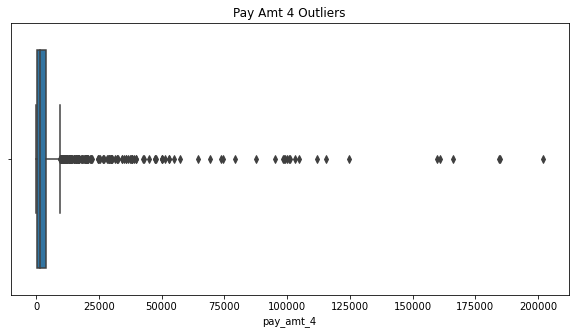

Skewness: 8.466946464009737


In [44]:
# Cek outliers 'pay_amt_4'
plt.figure(figsize=(10,5))
sns.boxplot(X_train_num.pay_amt_4)
plt.title('Pay Amt 4 Outliers')
plt.show()

print('Skewness:', X_train_num['pay_amt_4'].skew())

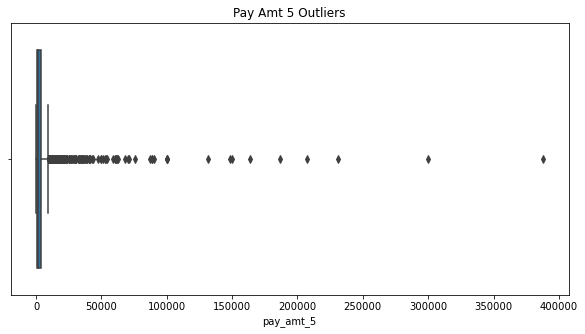

Skewness: 12.752092959348472


In [45]:
# Cek outliers 'pay_amt_5'
plt.figure(figsize=(10,5))
sns.boxplot(X_train_num.pay_amt_5)
plt.title('Pay Amt 5 Outliers')
plt.show()

print('Skewness:', X_train_num['pay_amt_5'].skew())

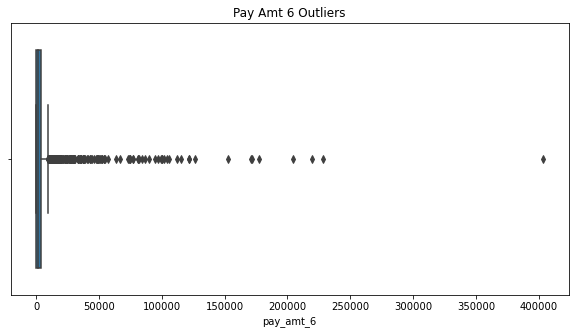

Skewness: 10.349883720284078


In [46]:
# Cek outliers 'pay_amt_6'
plt.figure(figsize=(10,5))
sns.boxplot(X_train_num.pay_amt_6)
plt.title('Pay Amt 6 Outliers')
plt.show()

print('Skewness:', X_train_num['pay_amt_6'].skew())

Bila kita mengacu pada boxplot-boxplot diatas, maka terdapat banyak sekali outliers. Namun, untuk project kali ini, saya memutuskan untuk memproses outliers. Dengan kata lain, outliers disini saya anggap outliers yang bersifat natural. Berhubung ini merupakan data penggunaan kartu kredit, tentunya beheviour setiap orang dalam menggunakan kartu kredit akan berbeda-beda. 

Misalnya, ada orang yang akan selalu tepat membayar tagihan, ada orang yang sering terlambat membayar tagihan, ada orang yang tunggakannya sudah berbulan-bulan, dst. Selain itu limit dari kartu kredit juga tentunya akan berbeda-beda, ada orang yang memegang kartu dengan limit tinggi, menengah, atau rendah. Sehingga saya rasa tidak pas jika kita melakukan trimming atau modifikasi outliers. Karena bila proses tersebut dilakukan, tentunya akan berpengaruh pada prediksi yang akan dikeluarkan oleh model.

# Feature Scaling

In [47]:
# Normalisasi menggunakan MinMaxScaler karena datasetnya bersifat skewed
scaler = MinMaxScaler()

# Fit hanya untuk train set
scaler.fit(X_train_num)

# Transfrom train dan test set
X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[0.13924051, 0.03272599, 0.19066566, ..., 0.02474317, 0.01288424,
        0.00991326],
       [0.18987342, 0.01846004, 0.11899278, ..., 0.00740316, 0.00385496,
        0.00370756],
       [0.11392405, 0.11807549, 0.22633316, ..., 0.00786338, 0.0051537 ,
        0.00373234],
       ...,
       [0.01265823, 0.02539634, 0.12564563, ..., 0.        , 0.00196356,
        0.        ],
       [0.43037975, 0.01846004, 0.1164137 , ..., 0.        , 0.        ,
        0.        ],
       [0.21518987, 0.020059  , 0.11657231, ..., 0.00870959, 0.00212848,
        0.00204709]])

# Feature Encoding

Dalam project ini, tidak perlu dilakukan proses normalisasi terhadap kolom kategorikal, karena dataset yang diperoleh dari Google Cloud Platform sudah bersifat encoded. Sehingga dapat langsung digunakan.

In [48]:
X_test_cat

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
405,0,0,0,0,0,0
2689,-1,-1,-1,0,-1,-1
1517,0,0,-1,-1,-1,-2
39,0,0,0,0,0,0
2096,-2,-2,-2,-2,-2,-2
...,...,...,...,...,...,...
506,0,0,0,0,0,0
1944,-1,2,2,-1,-1,2
938,0,0,0,0,0,0
2934,-1,-1,-1,-2,-2,-1


In [49]:
X_train_cat

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
810,-1,0,0,0,0,0
2575,1,-1,-1,-1,-1,-1
366,0,0,0,0,0,0
2622,-1,-1,-1,-1,-1,-1
2891,1,-1,-1,-2,-2,-2
...,...,...,...,...,...,...
1337,0,0,0,2,2,2
406,0,0,0,0,0,0
1414,0,0,0,0,2,2
2191,1,-2,-2,-2,-2,-2


# Concat kolom setelah proses scaling dan encoding

In [50]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat], axis =1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat], axis = 1)
X_train_final

array([[ 0.13924051,  0.03272599,  0.19066566, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.18987342,  0.01846004,  0.11899278, ..., -1.        ,
        -1.        , -1.        ],
       [ 0.11392405,  0.11807549,  0.22633316, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.01265823,  0.02539634,  0.12564563, ...,  0.        ,
         2.        ,  2.        ],
       [ 0.43037975,  0.01846004,  0.1164137 , ..., -2.        ,
        -2.        , -2.        ],
       [ 0.21518987,  0.020059  ,  0.11657231, ..., -1.        ,
        -1.        , -1.        ]])

# Model definition

Dalam project ini, beberapa model yang merupakan algoritma supervised learning akan dibuat, yakni:

- Logistic Regression
- SVC
- Decision Tree
- Random Forest
- KNN
- Naive Bayes
- AdaBoost

Sedangkan metrics yang akan digunakan untuk mengevaluasi performa model adalah:

- Classification Report
- Accuracy Score
- ROC-AUC Score

In [51]:
# Membuat model
model_Logreg = LogisticRegression()
model_SVC = SVC()
model_DT = DecisionTreeClassifier()
model_RF = RandomForestClassifier()
model_KNN = KNeighborsClassifier()
model_NB = BernoulliNB()
model_AB = AdaBoostClassifier()

# Model training

In [52]:
# Fit hanya untuk train set
model_Logreg.fit(X_train_final, y_train)
model_SVC.fit(X_train_final, y_train)
model_DT.fit(X_train_final, y_train)
model_RF.fit(X_train_final, y_train)
model_KNN.fit(X_train_final, y_train)
model_NB.fit(X_train_final, y_train)
model_AB.fit(X_train_final, y_train)

AdaBoostClassifier()

# Model Evaluation

# Predict

In [53]:
# Predict train dan test set model Logreg
y_pred_train_I = model_Logreg.predict(X_train_final)
y_pred_test_I = model_Logreg.predict(X_test_final)

# Predict train dan test set model SVC
y_pred_train_II = model_SVC.predict(X_train_final)
y_pred_test_II = model_SVC.predict(X_test_final)

# Predict train dan test set model DT
y_pred_train_III = model_DT.predict(X_train_final)
y_pred_test_III = model_DT.predict(X_test_final)

# Predict train dan test set model RF
y_pred_train_IV = model_RF.predict(X_train_final)
y_pred_test_IV = model_RF.predict(X_test_final)

# Predict train dan test set model NB
y_pred_train_V = model_NB.predict(X_train_final)
y_pred_test_V = model_NB.predict(X_test_final)

# Predict train dan test set model KNN
y_pred_train_VI = model_KNN.predict(X_train_final)
y_pred_test_VI = model_KNN.predict(X_test_final)

# Predict train dan test set model AB
y_pred_train_VII = model_AB.predict(X_train_final)
y_pred_test_VII = model_AB.predict(X_test_final)

# Classification report

In [54]:
# Model evaluation classification report Logreg
print('Classification Report Logreg')
print(classification_report(y_train, y_pred_train_I))
print(classification_report(y_test, y_pred_test_I))

Classification Report Logreg
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1855
           1       0.74      0.33      0.45       509

    accuracy                           0.83      2364
   macro avg       0.79      0.65      0.68      2364
weighted avg       0.82      0.83      0.80      2364

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       469
           1       0.71      0.28      0.40       122

    accuracy                           0.83       591
   macro avg       0.77      0.62      0.65       591
weighted avg       0.81      0.83      0.80       591



In [55]:
# Model evaluation classification report SVC
print('Classification Report SVC')
print(classification_report(y_train, y_pred_train_II))
print(classification_report(y_test, y_pred_test_II))

Classification Report SVC
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1855
           1       0.75      0.45      0.56       509

    accuracy                           0.85      2364
   macro avg       0.81      0.71      0.74      2364
weighted avg       0.84      0.85      0.83      2364

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       469
           1       0.66      0.38      0.48       122

    accuracy                           0.83       591
   macro avg       0.76      0.66      0.69       591
weighted avg       0.81      0.83      0.81       591



In [56]:
# Model evaluation classification report DT
print('Classification Report DT')
print(classification_report(y_train, y_pred_train_III))
print(classification_report(y_test, y_pred_test_III))

Classification Report DT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1855
           1       0.99      0.99      0.99       509

    accuracy                           0.99      2364
   macro avg       0.99      0.99      0.99      2364
weighted avg       0.99      0.99      0.99      2364

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       469
           1       0.40      0.46      0.43       122

    accuracy                           0.74       591
   macro avg       0.63      0.64      0.63       591
weighted avg       0.76      0.74      0.75       591



In [57]:
# Model evaluation classification report RF
print('Classification Report RF')
print(classification_report(y_train, y_pred_train_IV))
print(classification_report(y_test, y_pred_test_IV))

Classification Report RF
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1855
           1       0.99      0.99      0.99       509

    accuracy                           0.99      2364
   macro avg       0.99      0.99      0.99      2364
weighted avg       0.99      0.99      0.99      2364

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       469
           1       0.58      0.40      0.47       122

    accuracy                           0.82       591
   macro avg       0.72      0.66      0.68       591
weighted avg       0.80      0.82      0.80       591



In [58]:
# Model evaluation classification report NB
print('Classification Report NB')
print(classification_report(y_train, y_pred_train_V))
print(classification_report(y_test, y_pred_test_V))

Classification Report NB
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1855
           1       0.52      0.51      0.51       509

    accuracy                           0.79      2364
   macro avg       0.69      0.69      0.69      2364
weighted avg       0.79      0.79      0.79      2364

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       469
           1       0.50      0.44      0.47       122

    accuracy                           0.79       591
   macro avg       0.68      0.66      0.67       591
weighted avg       0.78      0.79      0.79       591



In [59]:
# Model evaluation classification report KNN
print('Classification Report KNN')
print(classification_report(y_train, y_pred_train_VI))
print(classification_report(y_test, y_pred_test_VI))

Classification Report KNN
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1855
           1       0.73      0.53      0.61       509

    accuracy                           0.86      2364
   macro avg       0.80      0.74      0.76      2364
weighted avg       0.85      0.86      0.85      2364

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       469
           1       0.47      0.36      0.41       122

    accuracy                           0.78       591
   macro avg       0.66      0.63      0.64       591
weighted avg       0.77      0.78      0.77       591



In [60]:
# Model evaluation classification report AB
print('Classification Report AB')
print(classification_report(y_train, y_pred_train_VII))
print(classification_report(y_test, y_pred_test_VII))

Classification Report AB
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1855
           1       0.74      0.41      0.53       509

    accuracy                           0.84      2364
   macro avg       0.80      0.69      0.72      2364
weighted avg       0.83      0.84      0.82      2364

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       469
           1       0.65      0.39      0.48       122

    accuracy                           0.83       591
   macro avg       0.75      0.67      0.69       591
weighted avg       0.81      0.83      0.81       591



Untuk project ini, model yang berperforma baik menurut saya adalah model yang good fit dan tingkat recall label 0 tinggi (berhasil memprediksi nasabah mana yang tidak mengalami gagal bayar).

- Berdasarkan classiification report, model yang performanya baik adalah Logreg, SVC, Adaboost. Ketiga model ini merupakan good fit (dengan nilai berkisar 0.83-0.84) dan tingkat recall label 0 yang tinggi (dengan nilai berkisar 0.95-0.97).

- Model yang performanya standard adalah Naive bayes. Model ini good fit namun nilainya hanya 0.79, dan tingkat recall label 0 hanya 0.88.

- Sedangkan model yang performanya tidak baik adalah random forest, decision tree, dan KNN. Ketiga model mengalami overfitting yang cukup parah. Overfitting sebenarnya merupakan 'penyakit' yang sering dialami oleh model random forest dan decision tree. 

# Accuracy score

In [61]:
# Model evaluation accuracy score Logreg
print('Accuracy Score Logreg')
print('Train set:', accuracy_score(y_train, y_pred_train_I))
print('Test set:', accuracy_score(y_test, y_pred_test_I))

Accuracy Score Logreg
Train set: 0.8307952622673435
Test set: 0.8274111675126904


In [62]:
# Model evaluation accuracy score SVC
print('Accuracy Score SVC')
print('Train set:', accuracy_score(y_train, y_pred_train_II))
print('Test set:', accuracy_score(y_test, y_pred_test_II))

Accuracy Score SVC
Train set: 0.8494077834179357
Test set: 0.8307952622673435


In [63]:
# Model evaluation accuracy score DT
print('Accuracy Score DT')
print('Train set:', accuracy_score(y_train, y_pred_train_III))
print('Test set:', accuracy_score(y_test, y_pred_test_III))

Accuracy Score DT
Train set: 0.9949238578680203
Test set: 0.7445008460236887


In [64]:
# Model evaluation accuracy score RF
print('Accuracy Score RF')
print('Train set:', accuracy_score(y_train, y_pred_train_IV))
print('Test set:', accuracy_score(y_test, y_pred_test_IV))

Accuracy Score RF
Train set: 0.9949238578680203
Test set: 0.8155668358714044


In [65]:
# Model evaluation accuracy score NB
print('Accuracy Score NB')
print('Train set:', accuracy_score(y_train, y_pred_train_V))
print('Test set:', accuracy_score(y_test, y_pred_test_V))

Accuracy Score NB
Train set: 0.7935702199661591
Test set: 0.7918781725888325


In [66]:
# Model evaluation accuracy score KNN
print('Accuracy Score KNN')
print('Train set:', accuracy_score(y_train, y_pred_train_VI))
print('Test set:', accuracy_score(y_test, y_pred_test_VI))

Accuracy Score KNN
Train set: 0.8557529610829103
Test set: 0.7834179357021996


In [67]:
# Model evaluation accuracy score AB
print('Accuracy Score AB')
print('Train set:', accuracy_score(y_train, y_pred_train_VII))
print('Test set:', accuracy_score(y_test, y_pred_test_VII))

Accuracy Score AB
Train set: 0.8426395939086294
Test set: 0.8307952622673435


Hasil dari accuracy score mengkonfirmasi classification report. Dimana model yang performanya baik adalah Logreg, SVC, dan Adaboost. Untuk Naive Bayes performanya cukup baik, namun nilai accuracy scorenya masih dibawah ketiga model yang performanya baik. Sedangkan model yang performanya tidak baik adalah random forest, decision tree, dan KNN. Ketiga model mengalami overfitting yang cukup parah.

# ROC-AUC

In [68]:
# Model evaluation ROC-AUC Logreg
print('ROC-AUC Logreg')
print('Train set:', roc_auc_score(y_train, y_pred_train_I))
print('Test set:', roc_auc_score(y_test, y_pred_test_I))

ROC-AUC Logreg
Train set: 0.6477009516042767
Test set: 0.6244188891607536


In [69]:
# Model evaluation ROC-AUC SVC
print('ROC-AUC SVC')
print('Train set:', roc_auc_score(y_train, y_pred_train_II))
print('Test set:', roc_auc_score(y_test, y_pred_test_II))

ROC-AUC SVC
Train set: 0.7051784853764318
Test set: 0.6629382362193715


In [70]:
# Model evaluation ROC-AUC DT
print('ROC-AUC DT')
print('Train set:', roc_auc_score(y_train, y_pred_train_III))
print('Test set:', roc_auc_score(y_test, y_pred_test_III))

ROC-AUC DT
Train set: 0.9917760632072823
Test set: 0.6388898598343179


In [71]:
# Model evaluation ROC-AUC RF
print('ROC-AUC RF')
print('Train set:', roc_auc_score(y_train, y_pred_train_IV))
print('Test set:', roc_auc_score(y_test, y_pred_test_IV))

ROC-AUC RF
Train set: 0.9917760632072823
Test set: 0.6624401412143031


In [72]:
# Model evaluation ROC-AUC NB
print('ROC-AUC NB')
print('Train set:', roc_auc_score(y_train, y_pred_train_V))
print('Test set:', roc_auc_score(y_test, y_pred_test_V))

ROC-AUC NB
Train set: 0.6902694888238129
Test set: 0.6626760809535461


In [73]:
# Model evaluation ROC-AUC KNN
print('ROC-AUC KNN')
print('Train set:', roc_auc_score(y_train, y_pred_train_VI))
print('Test set:', roc_auc_score(y_test, y_pred_test_VI))

ROC-AUC KNN
Train set: 0.7377326717468319
Test set: 0.6270229648012863


In [74]:
# Model evaluation ROC-AUC AB
print('ROC-AUC AB')
print('Train set:', roc_auc_score(y_train, y_pred_train_VII))
print('Test set:', roc_auc_score(y_test, y_pred_test_VII))

ROC-AUC AB
Train set: 0.687323063562082
Test set: 0.6659704987940859


Hasil dari ROC-AUC Mengkonfirmasi kedua test sebelummya, dimana model yang performanya baik adalah Logreg, SVC, dan Adaboost. Untuk Naive Bayes performanya cukup baik, namun nilainya dibawah ketiga model yang performanya baik. Sedangkan model yang performanya tidak baik adalah random forest, decision tree, dan KNN. Ketiga model mengalami overfitting yang cukup parah.

# Cross validation

In [75]:
cross_val_Logreg = cross_val_score(model_Logreg, X_train_final, y_train, cv=5)
print('Cross validation Logreg:', cross_val_Logreg.mean())

Cross validation Logreg: 0.8307978285018096


In [76]:
cross_val_SVC = cross_val_score(model_SVC, X_train_final, y_train, cv=5)
print('Cross validation SVC:', cross_val_SVC.mean())

Cross validation SVC: 0.8388343426380478


In [77]:
cross_val_DT = cross_val_score(model_DT, X_train_final, y_train, cv=5)
print('Cross validation DT:', cross_val_DT.mean())

Cross validation DT: 0.7406949869208442


In [78]:
cross_val_RF = cross_val_score(model_RF, X_train_final, y_train, cv=5)
print('Cross validation RF:', cross_val_RF.mean())

Cross validation RF: 0.8223295230587307


In [79]:
cross_val_NB = cross_val_score(model_NB, X_train_final, y_train, cv=5)
print('Cross validation NB:', cross_val_NB.mean())

Cross validation NB: 0.7927186727344394


In [80]:
cross_val_KNN = cross_val_score(model_KNN, X_train_final, y_train, cv=5)
print('Cross validation KNN:', cross_val_KNN.mean())

Cross validation KNN: 0.8016035403303832


In [81]:
cross_val_AB = cross_val_score(model_AB, X_train_final, y_train, cv=5)
print('Cross validation AB:', cross_val_AB.mean())

Cross validation AB: 0.8341822840147634


Setelah dilakukan cross validation dengan dibagi kedalam 5 folds. Hasilnya seluruh model kecuali decision tree mengalami peningkatan performa. Nilai tertinggi didapatkan oleh SVC dengan 0.838. Karena SVC merupakan model dengan performa terbaik, maka akan dilakukan GridSearch terhadap model ini untuk menentukan parameter mana yang paling baik untuk model ini. 

# Grid search

In [82]:
# Hyperparameter SVC
params_SVC = {'C': [0.25, 0.5, 0.75, 1], 
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'gamma': ['auto', 'scale']}

In [83]:
grid_SVC = GridSearchCV(model_SVC, params_SVC, cv = 5 )

In [84]:
grid_SVC.fit(X_train_final, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.25, 0.5, 0.75, 1], 'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [85]:
grid_SVC.best_params_

{'C': 0.75, 'gamma': 'scale', 'kernel': 'rbf'}

In [86]:
Best_Params_SVC = cross_val_score(grid_SVC.best_estimator_, X_train_final, y_train, cv=5)
print('SVC with best params:', Best_Params_SVC.mean())

SVC with best params: 0.8401037374135522


Setelah dilakukan GridSearch terhadap model SVC, parameter terbaiknya adalah 'C': 0.75, 'gamma': 'scale', dan 'kernel': 'rbf'
Dengan parameter ini, model SVC mengalami peningkatan menjadi 0.84.

# Inference

In [87]:
df_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,420000,2,2,2,32,0,0,0,0,0,0,211688,205003,203118,198925,175684,164037,7300,8839,8000,5900,6000,6000,0
1,30000,2,2,2,25,2,0,0,0,0,0,10343,11069,12082,12473,12623,27460,1200,1201,592,500,1500,0,1
2,40000,2,3,1,60,0,0,0,0,0,0,14019,15780,18519,21058,8204,9899,2000,3000,3000,6000,2000,2000,0
3,70000,2,3,3,39,0,0,-1,0,-1,0,34244,32193,10803,15133,3148,4699,3000,11000,5000,3150,2000,4000,0
4,60000,2,2,2,24,-1,0,-1,0,0,0,9970,7699,9479,10213,10000,11832,1020,9479,1000,200,1832,5889,0
5,300000,2,1,1,30,0,0,0,0,0,0,93738,84636,88446,76244,67747,70389,3000,5000,2500,2500,3500,87000,1
6,500000,1,1,2,43,0,0,0,-1,-1,-1,504644,512650,0,3887,0,7413,22650,0,3887,0,7413,0,1
7,490000,2,2,1,30,0,0,0,0,0,-1,26088,24092,24488,16995,-1527,62491,2003,2041,1092,4,64895,3003,0
8,80000,1,1,2,26,1,2,2,0,0,0,40029,41095,40137,40793,42990,42854,2000,0,1603,3000,2000,1056,0
9,130000,2,2,1,34,2,2,2,2,2,2,28967,30776,33071,32336,34186,34588,2500,3000,0,2600,1000,1500,1


In [88]:
# Membagi dataset inference berdasarkan kategori
df_inf_num = df_inf[num_cols]
df_inf_cat = df_inf[cat_cols]

In [89]:
# Proses normalisasi dengan scaler
df_inf_num_scaled = scaler.transform(df_inf_num)

In [90]:
# Concat dataset yang sudah dinormalisasi menjadi satu
df_inf_final = np.concatenate([df_inf_num_scaled, df_inf_cat], axis = 1)
df_inf_final

array([[ 5.18987342e-01,  3.56941502e-01,  4.69835463e-01,
         3.90599072e-01,  4.58602818e-01,  4.54988457e-01,
         4.36338932e-01,  1.47965575e-02,  7.20326759e-03,
         4.01588282e-02,  2.91969358e-02,  1.54610883e-02,
         1.48698885e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 2.53164557e-02,  3.49981212e-02,  1.35496473e-01,
         6.41283079e-02,  1.10377543e-01,  1.21262853e-01,
         1.53453093e-01,  2.43231082e-03,  9.78744697e-04,
         2.97175328e-03,  2.47431659e-03,  3.86527208e-03,
         0.00000000e+00,  2.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 3.79746835e-02,  4.08759124e-02,  1.43618158e-01,
         7.51288120e-02,  1.26411236e-01,  1.12218793e-01,
         1.17079779e-01,  4.05385136e-03,  2.44482439e-03,
         1.50595606e-02,  2.96917991e-02,  5.15369610e-03,
    

In [91]:
# Predict
y_pred_inf_I = model_Logreg.predict(df_inf_final)
y_pred_inf_II = model_SVC.predict(df_inf_final)
y_pred_inf_III = model_DT.predict(df_inf_final)
y_pred_inf_IV = model_RF.predict(df_inf_final)
y_pred_inf_V = model_NB.predict(df_inf_final)
y_pred_inf_VI = model_KNN.predict(df_inf_final)
y_pred_inf_VII = model_AB.predict(df_inf_final)
y_pred_inf_VIII = grid_SVC.best_estimator_.predict(df_inf_final)

In [92]:
# Mememasukan hasil prediksi kedalam dataset
hasil_prediksi = pd.DataFrame({'Logreg': y_pred_inf_I, 'SVC': y_pred_inf_II, 'DT': y_pred_inf_III, 'RF':y_pred_inf_IV, 'NB': y_pred_inf_V, 'KNN':y_pred_inf_VI, 'AB':y_pred_inf_VII, 'grid_SVC':y_pred_inf_VIII})

In [93]:
# Concat kolom
pd.concat([df_inf, hasil_prediksi], axis=1)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month,Logreg,SVC,DT,RF,NB,KNN,AB,grid_SVC
0,420000,2,2,2,32,0,0,0,0,0,0,211688,205003,203118,198925,175684,164037,7300,8839,8000,5900,6000,6000,0,0,0,0,0,0,0,0,0
1,30000,2,2,2,25,2,0,0,0,0,0,10343,11069,12082,12473,12623,27460,1200,1201,592,500,1500,0,1,1,1,1,1,0,1,1,1
2,40000,2,3,1,60,0,0,0,0,0,0,14019,15780,18519,21058,8204,9899,2000,3000,3000,6000,2000,2000,0,0,0,0,0,0,0,0,0
3,70000,2,3,3,39,0,0,-1,0,-1,0,34244,32193,10803,15133,3148,4699,3000,11000,5000,3150,2000,4000,0,0,0,1,0,0,0,0,0
4,60000,2,2,2,24,-1,0,-1,0,0,0,9970,7699,9479,10213,10000,11832,1020,9479,1000,200,1832,5889,0,0,0,0,0,0,0,0,0
5,300000,2,1,1,30,0,0,0,0,0,0,93738,84636,88446,76244,67747,70389,3000,5000,2500,2500,3500,87000,1,0,0,0,0,0,0,0,0
6,500000,1,1,2,43,0,0,0,-1,-1,-1,504644,512650,0,3887,0,7413,22650,0,3887,0,7413,0,1,0,0,0,0,0,0,0,0
7,490000,2,2,1,30,0,0,0,0,0,-1,26088,24092,24488,16995,-1527,62491,2003,2041,1092,4,64895,3003,0,0,0,0,0,0,0,0,0
8,80000,1,1,2,26,1,2,2,0,0,0,40029,41095,40137,40793,42990,42854,2000,0,1603,3000,2000,1056,0,0,0,0,0,1,0,0,0
9,130000,2,2,1,34,2,2,2,2,2,2,28967,30776,33071,32336,34186,34588,2500,3000,0,2600,1000,1500,1,1,1,1,1,1,1,1,1


Setelah diuji dengan data inference, model yang performanya baik adalah Logreg, SVC, Adaboost, dan SVC dengan parameter terbaik berdasarkan GridSearch. 

Untuk decision tree, random forest, dan KNN selain mengalami overfitting, ternyata performanya juga tidak stabil. Setelah diuji dengan data inference, decision tree dan KNN mengalami peningkatan performa sedangkan random forest mengalami penurunan performa. 

Sedangkan Naive Bayes yang hasil train dan test setnya good fit, ternyata malah mengalami penurunan performa setelah diuji dengan data inference.

Interpretasi dari kolom target:

- 0 = No (tidak gagal bayar)
- 1 = Yes (gagal bayar)
Sumber: https://towardsdatascience.com/catching-a-welcher-classifying-a-credit-card-defaulter-f4b21547a618


# Conclusion

# Dataset secara umum

Hal yang paling menarik perhatian saya dari dataset ini adalah tingginya presentase pemegang kartu kredit yang mengalami gagal bayar pada periode April - September 2005. Presentase tersebut cukup tinggi karena mencapai 21.4%. Ternyata setelah ditelusuri lebih lanjut, pada periode tersebut Taiwan sedang mengalami krisis utang kartu kredit. Krisis tersebut mencapai puncaknya pada bulan April 2006 dimana sekitar 500,000 orang mengalami gagal bayar. Pada periode ini total utang kartu kredit mencapai 268 miliar USD. Akibat dari krisis ini sangat buruk karena banyak orang kehilangan aset, gagal membayar uang sekolah anak, bahkan sampai meningkatkan tingkat bunuh diri di Taiwan saat itu. 

Akar dari krisis ini adalah penggunaan kartu kredit yang kurang bijak. Pada saat itu, diperkirakan ada 133 kartu kredit yang di-issued per 100 orang di Taiwan. Artinya satu orang di Taiwan dapat memegang hingga empat atau lebih kartu kredit. Rate penggunaan kartu kredit juga sangat tinggi, dimana saat itu Taiwan merupakan customer terbesar Visa di wilayah Asia-Pasifik dan hanya tertinggal dari AS dan Inggris secara global. 

Moral story dari kasus ini sebenarnya cukup sederhana. Kita harus bijak dalam menggunakan kartu kredit, gunakan kartu kredit sesuai dengan kemampuan kita, kontrol penggunaan kartu kredit, dan perlakukan kartu kredit sebagai hanya sebagai last resort. Ingat bahwa dengan menggunakan kartu kredit itu sama saja dengan kita berutang ke bank.

Sumber: https://sevenpillarsinstitute.org/case-studies/taiwans-credit-card-crisis/, https://www.proquest.com/docview/198853005

# Algoritma, model, dan evaluation metrics

- Berdasarkan hasil uji dengan dataset inference, model yang performanya baik adalah Logreg, SVC, Adaboost, dan SVC dengan parameter terbaik berdasarkan GridSearch. Performa keempat model ini cukup seragam dimana seluruhnya hanya salah mengklasifikasikan target sebanyak dua kali.

- Model decision tree, random forest, dan KNN mengalami overfitting saat diuji dengan test set. Selain itu performanya juga tidak stabil ketika diuji dengan data inference. Setelah diuji dengan data inference, decision tree dan KNN mengalami peningkatan performa sedangkan random forest mengalami penurunan performa. 

- Yang cukup menarik adalah hasil uji inference Naive Bayes. Pada saat proses evaluasi, model ini performanya cukup baik dan merupakan good fit, namun ketika diuji dengan data inference ternyata mengalami penurunan performa. 

- Menemukan model terbaik untuk sebuah dataset tidaklah mudah. Karena Dataset yang sedang kita kerjakan kadangkala cocok dengan suatu model, namun tidak cocok dengan model lainnya. Disinilah pentingnya bagi kita untuk membuat beberapa model dan membandingkan performa model-model tersebut untuk menemukan model dengan performa terbaik. 


# Jawab pertanyaan

1. Apakah fungsi parameter `criterion` pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!

Dalam decision tree, criterion berfungsi untuk menentukan parameter apa yang digunakan untuk memisahkan atribut. Tujuannya untuk mengoptimalkan nilai split dari decision tree yang dibuat.

Salah satu parameter criterion dalam decision tree adalah gini index. Parameter ini mengukur ketidaksetaraan antara distribusi dan karakteristik label, lalu mengeluarkan hasil pengurangan gini index rata-rata yang nantinya menghasilkan decision tree.

Sumber: https://sis.binus.ac.id/2022/02/17/mengenal-algoritma-decision-tree/

2. Apakah fungsi dari `pruning` pada Tree model?

Pruning dalam tree model dapat diibaratkan dengan mengidentifikasi dan memotong cabang yang tidak diperlukan dari pohon. Ketika membuat decision tree, hasil yang dikeluarkan sering kali berukuran besar. Pruning menyederhanakan hal ini dengan melakukan pemangkasan berdasarkan confidence level.

Sumber: http://diyanaprilia.blog.widyatama.ac.id/2019/10/08/4-decision-tree/

3. Bagaimana cara memilih `K` yang optimal pada KNN?

Tidak ada cara yang pasti untuk memilih 'K' yabg paling optimal dalam KNN. Cara yang paling baik adalah dengan melakukan trial and error. Namun dalam dunia data science ada beberapa cara yang umum dilakukan. Seperti menggunakan elbow method, memilih K value ganjil ketika target kelasnya genap, dan sebaliknya, atau memasukan K value secara random.

Sumber: https://www.quora.com/How-can-I-choose-the-best-K-in-KNN-K-nearest-neighbour-classification, https://discuss.analyticsvidhya.com/t/how-to-choose-the-value-of-k-in-knn-algorithm/2606, https://stackoverflow.com/questions/11568897/value-of-k-in-k-nearest-neighbor-algorithm

4. Jelaskan apa yang kalian ketahui tentang `Cross Validation`!

Cross validation adalah salah satu metode yang dapat digunakan untuk mengevaluasi kinerja model. Cara kerjanya adalah dengan memisahkan data menjadi dua subset yaitu data train dan data validation. Untuk menjalankan cross validation biasanya kita harus menentukan jumlah fold yang gunanya untuk mengurangi waktu penghitungan dengan tetap memperhatikan keakuratan estimasi. 

Sumber: https://mti.binus.ac.id/2017/11/24/10-fold-cross-validation/

5. Jelaskan apa yang kalian ketahui tentang `Accuracy, Precision, Recall, F1 Score`!

- Accuracy menggambarkan keakuratan model atau algoritma dalam mengklasifikasikan dengan benar.

- Precision menggambarkan keakuratan antara target dengan hasil prediksi yang dikeluarkan oleh model. 

- Recall menggambarkan rasio prediksi true positive dibandingkan dengan hasil positive secara keseluruhan

- F1 score  menggambarkan perbandingan rata-rata precision dan recall yang dibobotkan.

Sumber: https://socs.binus.ac.id/2020/11/01/confusion-matrix/